In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("height-weight.csv")

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
df.columns

Index(['Weight', 'Height'], dtype='object')

In [6]:
#Dividing the Dataset into Independent and Dependent features

X = df[["Weight"]]
y = df["Height"]

In [7]:
#Train - Test Split on the Dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [8]:
#Standardising the Train Independent feature

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [9]:
#Applying Simple Linear Regression

from sklearn.linear_model import LinearRegression

SimpleLinearRegression = LinearRegression()
SimpleLinearRegression.fit(X_train, y_train)

y_pred = SimpleLinearRegression.predict(X_test)

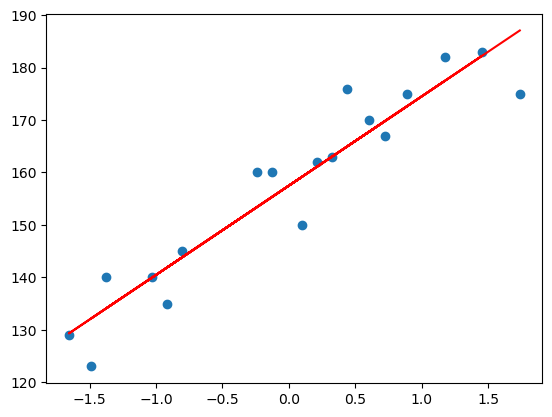

In [10]:
plt.scatter(X_train, y_train)
plt.plot(X_train, SimpleLinearRegression.predict(X_train), "r")  #Best Fit Line

In [11]:
#Comparing the Prediction of y test and y prediction

y_test, y_pred

(15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64,
 array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]))

In [12]:
print("The slope or coeeficient of Weight is:",SimpleLinearRegression.coef_)
print("The intercept is:",SimpleLinearRegression.intercept_)

The slope or coeeficient of Weight is: [17.03440872]
The intercept is: 157.5


In [13]:
#Performance metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
        #OR
rmse2 = np.sqrt(mse)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)
print("Root Mean Squared Error: ", rmse2)

Mean Squared Error:  109.77592599051654
Mean Absolute Error:  9.822657814519227
Root Mean Squared Error:  10.477400726827076
Root Mean Squared Error:  10.477400726827076


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [14]:
#Accuracy Metrics R2 Score

from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)

print("The Accuracy of the model is: ", score)

The Accuracy of the model is:  0.7769869860423441


## Adjusted R2 Score

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

1. R2: The R2 of the model
2. n: The number of observations
3. k: The number of predictor variables

In [15]:
#Adjusted R2 Score

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254

In [16]:
#New Data Point Weight is 80
new_weight = 80
scaled_weight = scalar.transform([[new_weight]])
scaled_weight

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [17]:
scaled_weight[0]

array([0.32350772])

In [18]:
print(f"The height prediction of the weight {new_weight} kg is",SimpleLinearRegression.predict(scaled_weight[[0]]))

The height prediction of the weight 80 kg is [163.01076266]


### Assumptions

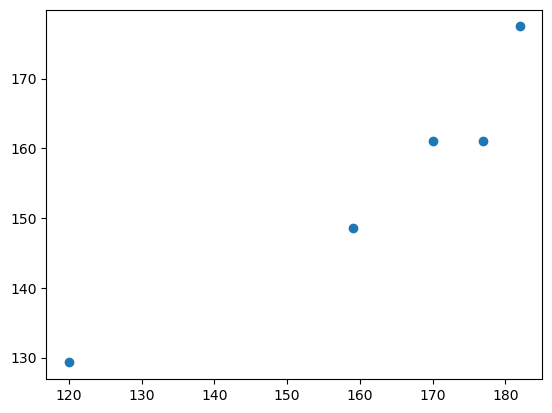

In [19]:
#Checking if the scatter plot of y test and predicted y test is Linear.

plt.scatter(y_test, y_pred)

/var/folders/pw/c8z06qcs10zdm1sq_8s5pdj40000gn/T/ipykernel_91775/447199343.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde = "True")


<Axes: xlabel='Height', ylabel='Density'>

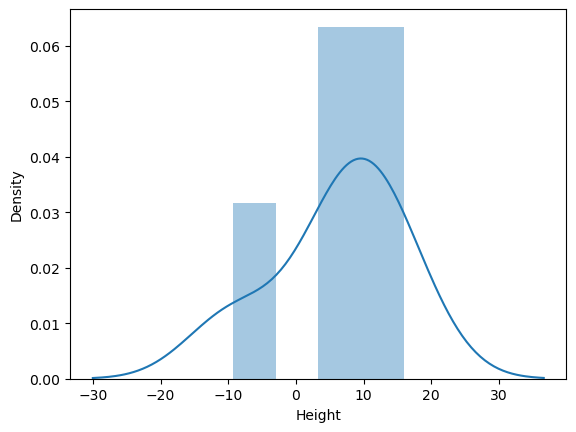

In [22]:
#Calculating the residuals and check if the plot of the residuals follows a Normal Distribution

residuals = y_test - y_pred
residuals

import seaborn as sns

sns.distplot(residuals, kde = "True")

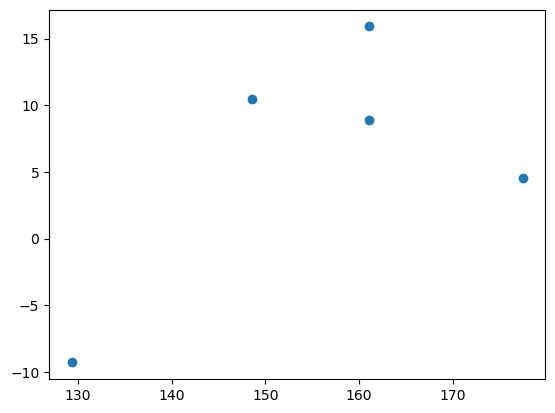

In [23]:
#Check the scatter plot of predicted y test and residuals to see if it follows Uniform Distribution

plt.scatter(y_pred, residuals)